# Carnevale, Cattoni MiniChallenge

We chosed the Hotel dataset

In [ ]:
import pickle
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
with open("hotels.pk", "rb") as f:
    df = pickle.load(f)

# 1. EXPLORATORY ANALYSIS

In [3]:
df.shape

(23254, 4)

In [4]:
df.head()

,Location,Revenue,Demand,Occupancy
Date,,,,
2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [5]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=23254, freq=None)

In [6]:
df = df.reset_index()
df.head()

,Date,Location,Revenue,Demand,Occupancy
0,2013-01-01,NewYork,2.442363e+06,13063.675000,81.991307
1,2013-01-02,NewYork,2.018559e+06,13069.608539,82.028548
2,2013-01-03,NewYork,1.927676e+06,13069.608539,82.028548
3,2013-01-04,NewYork,1.781664e+06,12653.271887,79.415502
4,2013-01-05,NewYork,1.824994e+06,12827.322364,80.507892


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       23254 non-null  datetime64[ns]
 1   Location   23254 non-null  object        
 2   Revenue    23254 non-null  float64       
 3   Demand     23254 non-null  float64       
 4   Occupancy  23254 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 908.5+ KB


In [8]:
df.columns

Index(['Date', 'Location', 'Revenue', 'Demand', 'Occupancy'], dtype='object')

In [9]:
df["Location"].value_counts()

Location
Atlanta       3227
NewYork       2861
Orlando       2861
Chicago       2861
LosAngeles    2861
Washington    2861
Dallas        2861
Boston        2861
Name: count, dtype: int64

We chose the Los Angeles city

In [10]:
df = df[df["Location"] == "LosAngeles"]
df["Location"].value_counts()

Location
LosAngeles    2861
Name: count, dtype: int64

In [11]:
assert (len(df["Location"].unique()) == 1 )
df = df.drop("Location", axis=1)
df.shape

(2861, 4)

In [12]:
assert (df["Date"].dt.year.min() == 2013)
assert (df["Date"].dt.year.max() == 2020)

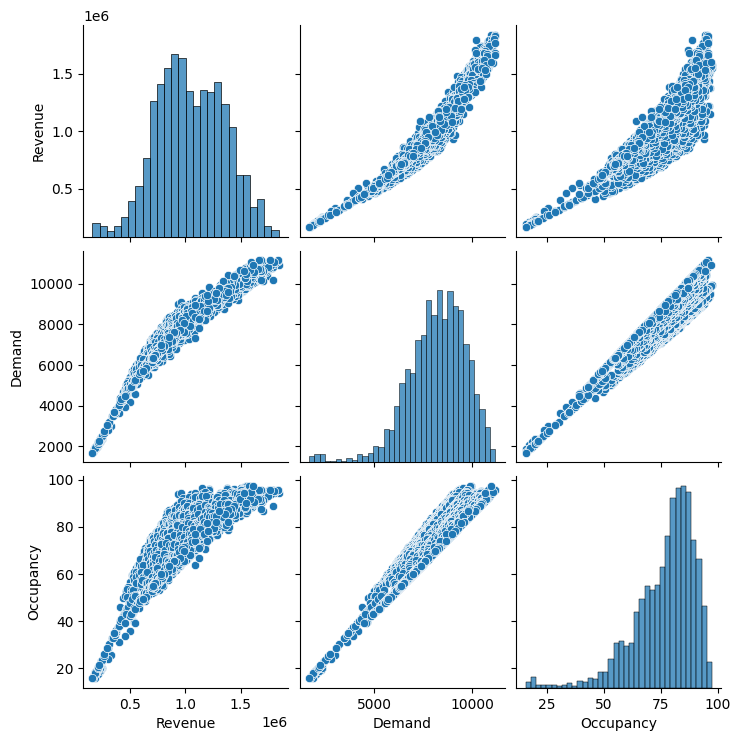

In [13]:
sns.pairplot(df)

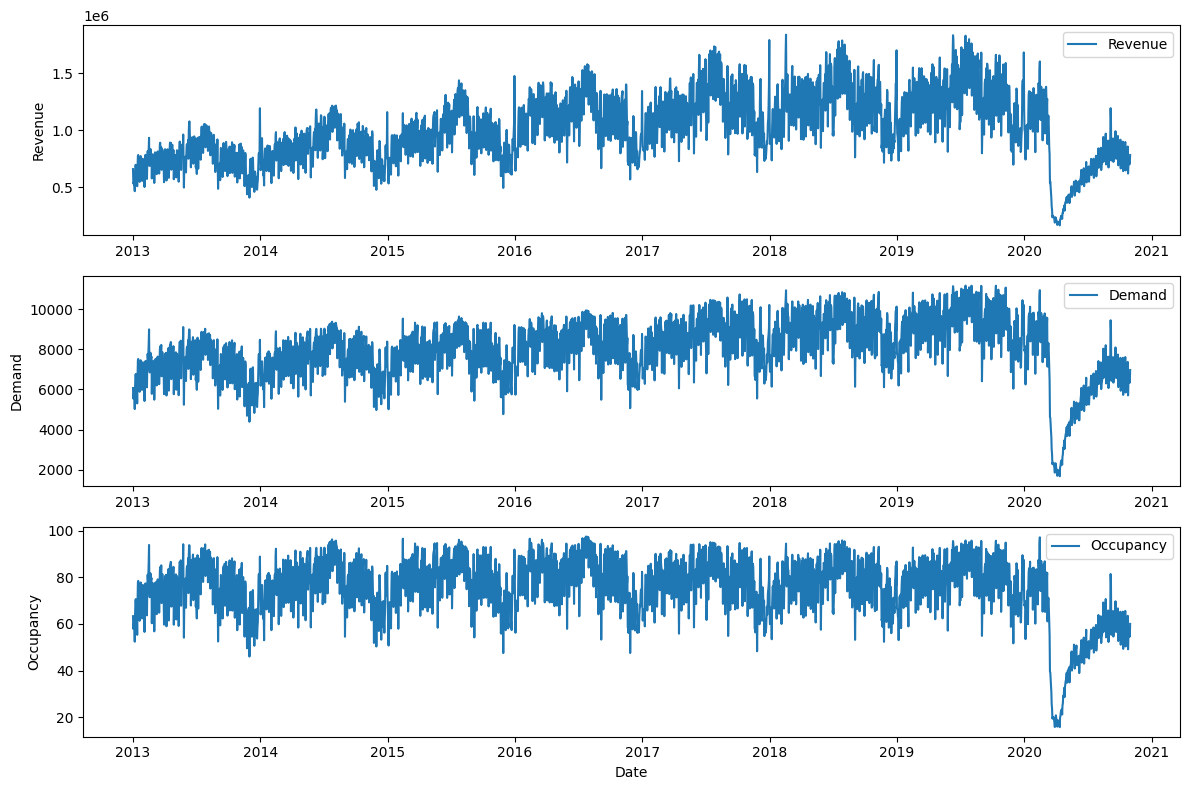

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes[0].plot(df["Date"], df["Revenue"], label="Revenue")
axes[0].set_ylabel("Revenue")
axes[0].legend()

axes[1].plot(df["Date"], df["Demand"], label="Demand")
axes[1].set_ylabel("Demand")
axes[1].legend()

axes[2].plot(df["Date"], df["Occupancy"], label="Occupancy")
axes[2].set_ylabel("Occupancy")
axes[2].set_xlabel("Date")
axes[2].legend()

plt.tight_layout()


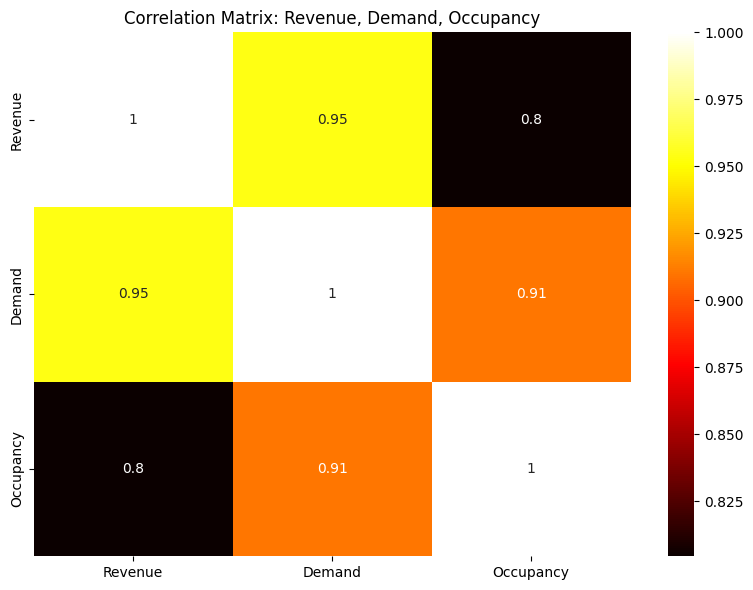

In [24]:
correlation_matrix = df[["Revenue", "Demand", "Occupancy"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "hot")
plt.title("Correlation Matrix: Revenue, Demand, Occupancy")
plt.tight_layout()
plt.show()

In [26]:
! pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.6 MB 16.8 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.6 MB 16.1 MB/s eta 0:00:01
   -------------------------------------- - 9.2/9.6 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 15.9 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 10.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\manuc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


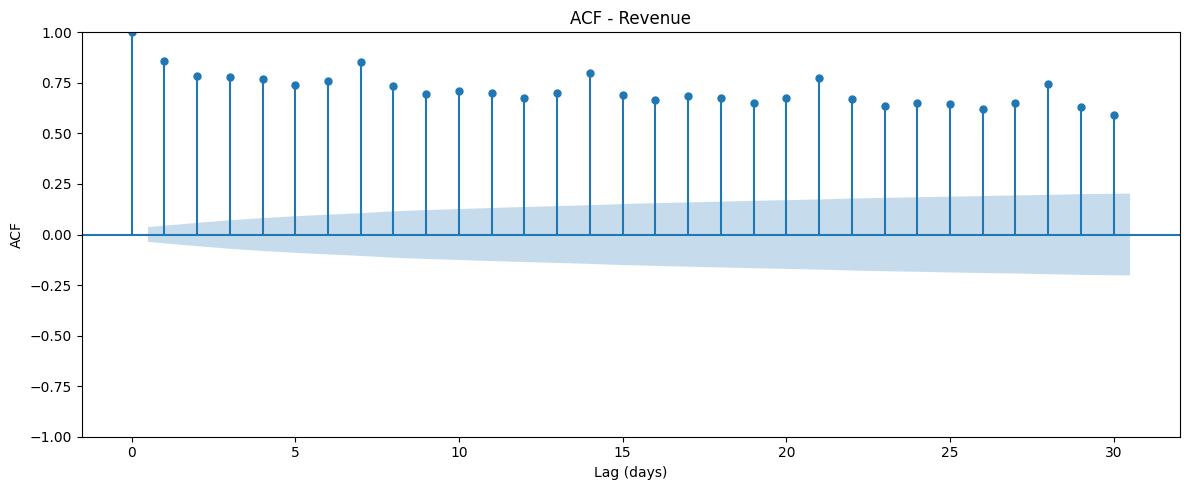

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 5))
plot_acf(df["Revenue"], lags=30, ax=ax)
plt.title("ACF - Revenue")
plt.xlabel("Lag (days)")
plt.ylabel("ACF")
plt.tight_layout()
plt.show()
